In [1]:
from src.util import groupped_image_data
import pandas as pd
import matplotlib.pyplot as plt
from src.util import get_label_map
import numpy as np

stat_df = groupped_image_data("data/TRAIN_images_metadata.csv")


In [3]:
len(stat_df["image_name"])

8040

[Text(0, 0, '5115'),
 Text(0, 0, '1185'),
 Text(0, 0, '674'),
 Text(0, 0, '596'),
 Text(0, 0, '158'),
 Text(0, 0, '117'),
 Text(0, 0, '98'),
 Text(0, 0, '97')]

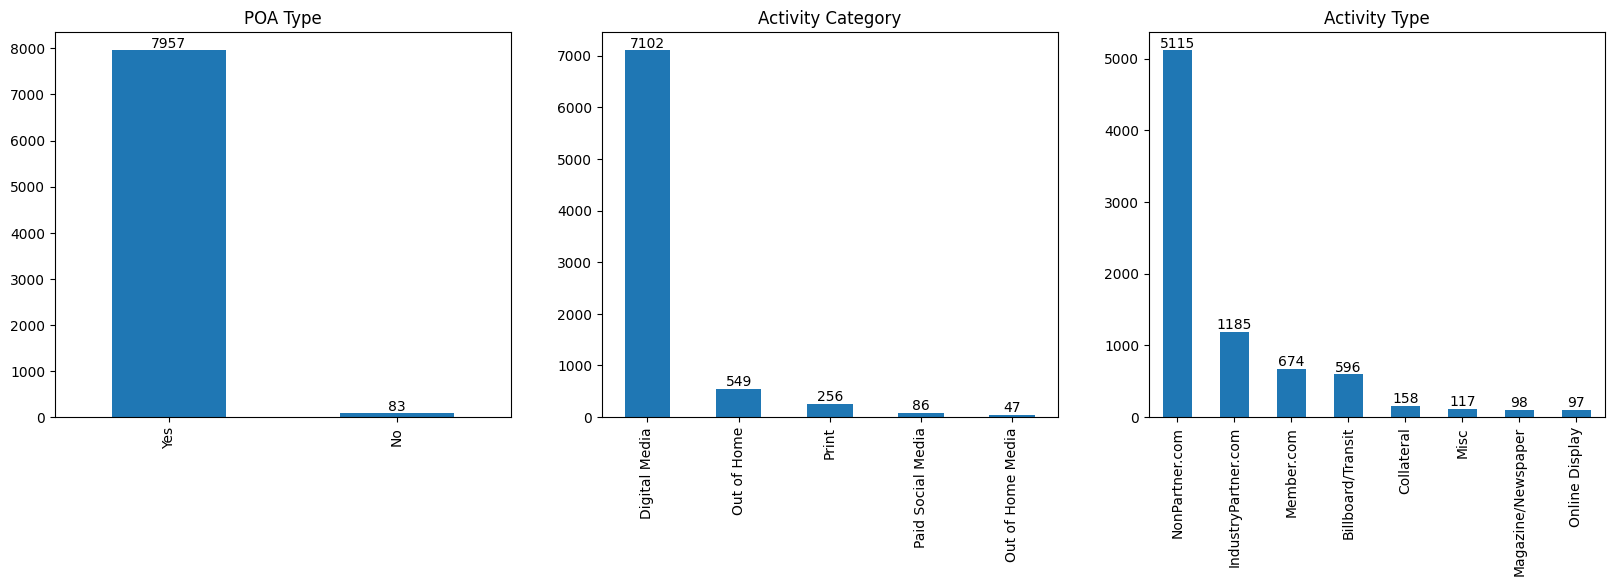

In [4]:
from src.util import groupped_image_data
import pandas as pd
import matplotlib.pyplot as plt

stat_df = groupped_image_data("data/TRAIN_images_metadata.csv")


fig, (ax_p, ax_c, ax_t) = plt.subplots(1, 3, figsize=(20, 5))

stat_df["POA_attribution"].value_counts().plot(kind='bar', ax = ax_p, title="POA Type")
ax_p.bar_label(ax_p.containers[0])
stat_df["activity_category"].value_counts().plot(kind='bar', ax=ax_c, title="Activity Category")
ax_c.bar_label(ax_c.containers[0])
stat_df["activity_type"].value_counts().plot(kind='bar', ax=ax_t, title="Activity Type")
ax_t.bar_label(ax_t.containers[0])

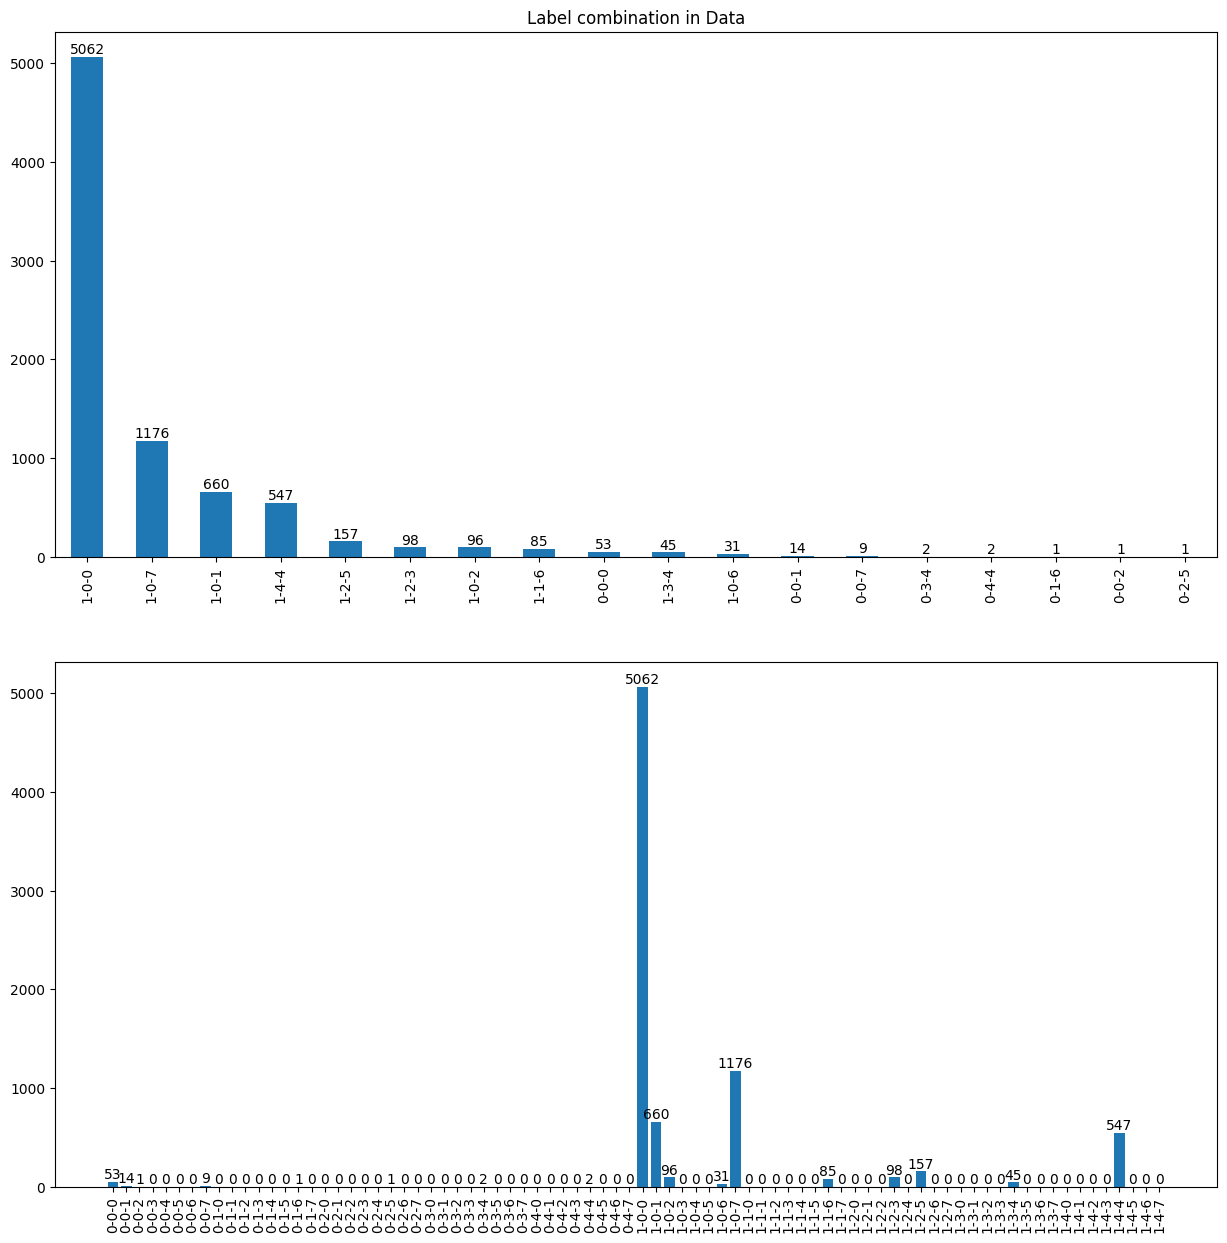

In [2]:

from itertools import product

label_map = get_label_map()

# change to int labels
stat_df["POA_attribution_label"] = stat_df["POA_attribution"].apply(lambda el: label_map["POA_attribution_map"][el])
stat_df["activity_category_label"] = stat_df["activity_category"].apply(lambda el: label_map["activity_category_map"][el])
stat_df["activity_type_label"] = stat_df["activity_type"].apply(lambda el: label_map["activity_type_map"][el])

stat_df['combined_label'] = stat_df[["POA_attribution_label","activity_category_label","activity_type_label"]].astype(str).agg('-'.join, axis=1)
possible_labels = list(product(label_map["POA_attribution_map"].values(), 
                               label_map["activity_category_map"].values(), 
                               label_map["activity_type_map"].values()))
possible_lable_str = ['-'.join([str(l) for l in lab]) for lab in possible_labels]

fig, (ax_ext, ax_all) = plt.subplots(2,1,figsize=(15,15))

s_vc = stat_df['combined_label'].value_counts()
s_vc.plot(kind='bar', ax=ax_ext, title="Label combination in Data")
ax_ext.bar_label(ax_ext.containers[0])

ax_all.bar(x=possible_lable_str, height=[s_vc[idx] if idx in s_vc.index else 0 for idx in possible_lable_str])
ax_all.bar_label(ax_all.containers[0])
ax_all.tick_params(axis='x', labelrotation = 90)


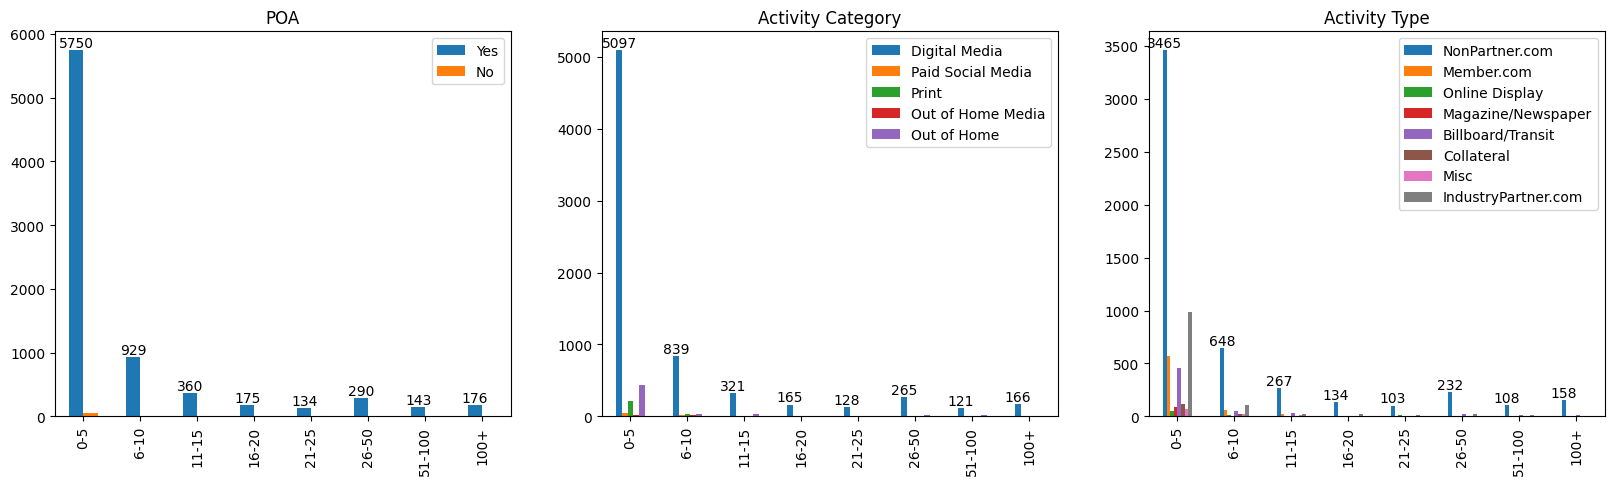

In [3]:

fig, (ax_img_poa, ax_img_ac, ax_img_at) = plt.subplots(1, 3, figsize=(20, 5))

bin_range = [0,5,10,15,20,25,50,100,np.inf]
bin_label = ["0-5", "6-10", "11-15", "16-20", "21-25", "26-50", "51-100", "100+"]

# POA graph
poa_df = pd.DataFrame(columns=["Yes", "No"])
poa_df["Yes"] = pd.cut(stat_df[stat_df["POA_attribution_label"] == 1]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)
poa_df["No"]  = pd.cut(stat_df[stat_df["POA_attribution_label"] == 0]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)
poa_df.plot(kind='bar', title='POA', ax = ax_img_poa)

ax_img_poa.bar_label(ax_img_poa.containers[0])
ax_img_poa.tick_params(axis='x', labelrotation = 90)

# Activity Category graph
ac_df = pd.DataFrame(columns=label_map["activity_category_map"])

for ac_lab in label_map["activity_category_map"]:
    ac_df[ac_lab] = pd.cut(stat_df[stat_df["activity_category"] == ac_lab]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)

ac_df.plot(kind='bar', title='Activity Category', ax = ax_img_ac)

ax_img_ac.bar_label(ax_img_ac.containers[0])
ax_img_ac.tick_params(axis='x', labelrotation = 90)

# Activity type graph
at_df = pd.DataFrame(columns=label_map["activity_type_map"])

for at_lab in label_map["activity_type_map"]:
    at_df[at_lab] = pd.cut(stat_df[stat_df["activity_type"] == at_lab]["image_name"].apply(len), bins= bin_range, labels=bin_label).value_counts().sort_index(axis=0)

at_df.plot(kind='bar', title='Activity Type', ax = ax_img_at)

ax_img_at.bar_label(ax_img_at.containers[0])
ax_img_at.tick_params(axis='x', labelrotation = 90)


plt.legend()

### Number of images that cover 90% of the samples: 20

In [16]:
orig_sz = stat_df.shape[0]
sel_sz = stat_df.loc[stat_df["image_name"].apply(len) < 20].shape[0]

print(sel_sz/orig_sz*100)

90.2860696517413


In [57]:
# for grp_it in stat_df["image_name"].sample(5):
#     print(grp_it.key)
# obj = stat_df["image_name"].sample(5)
# # for grp_ref, grp_img in obj.items():
# print(stat_df.loc[obj.keys()][["image_name","POA_attribution"]])

sl = []
sl.append([1,2,3])
sl.extend([[1,2,3], [2,3,4]])
print(sl)

[[1, 2, 3], [1, 2, 3], [2, 3, 4]]
